In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.metrics as mt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,ridge_regression,RidgeCV

In [47]:
data=pd.read_csv("estimate.csv")
data

,INFLATION,RATE,GDP GROWTH,XU100
0,80.21,14.5,27.2,3.171
1,69.97,15.5,26.9,2.431
2,48.69,15.5,13.4,1.946
3,36.08,15.5,7.3,1.858
4,19.25,20.5,6.8,1.472
...,...,...,...,...
66,7.93,16.5,3.6,446.000
67,7.72,17.5,3.1,398.000
68,7.91,18.0,3.1,309.000
69,8.18,19.0,3.3,236.000


<AxesSubplot:>

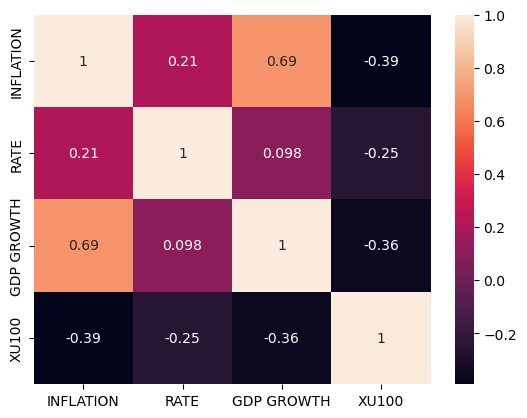

In [48]:
sns.heatmap(data.corr(),annot=True)

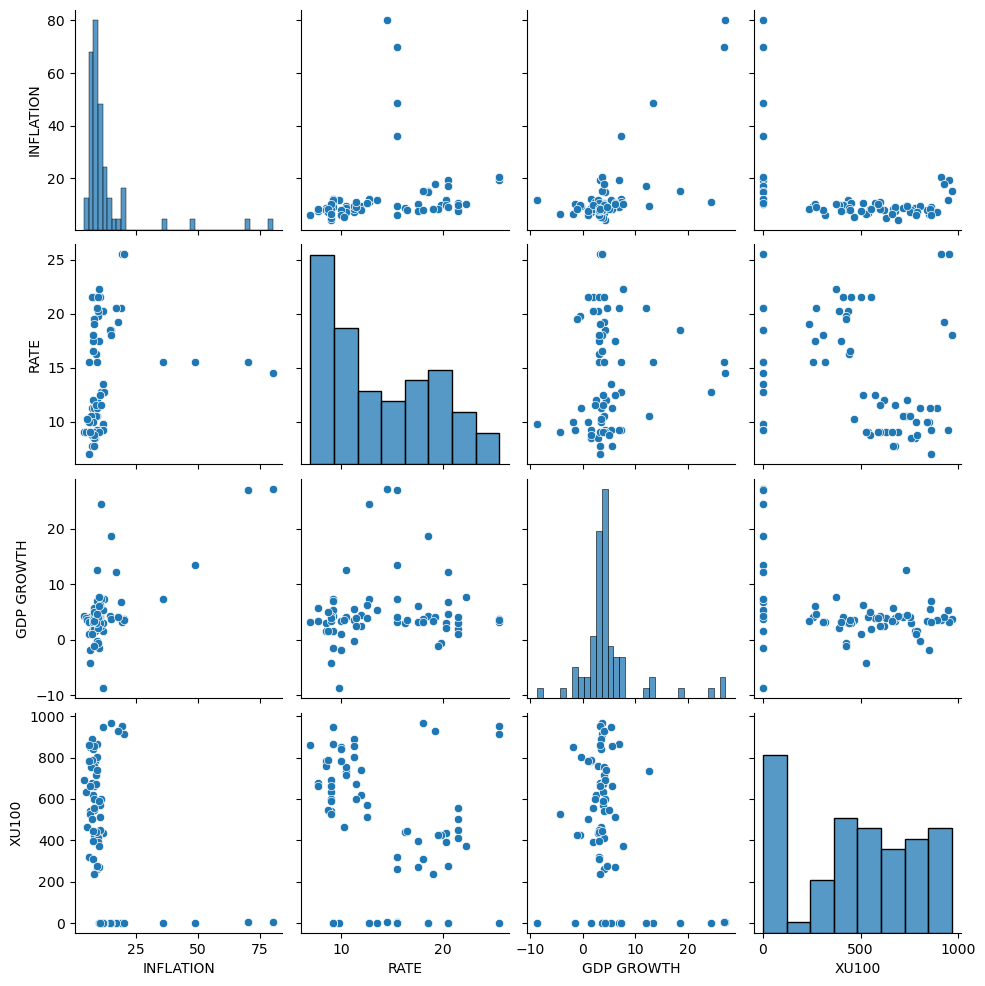

In [49]:
sns.pairplot(data)

In [71]:

linear=LinearRegression()
Ridge=Ridge()
lasso=Lasso()
elastic=ElasticNet()

X=data.drop("XU100", axis=1)
y=data["XU100"]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

linear.fit(X_train,y_train)
Ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)
elastic.fit(X_train,y_train)

lr_tahmin=linear.predict(X_test)
ridge_tahmin=Ridge.predict(X_test)
lasso_tahmin=lasso.predict(X_test)
elastic_tahmin=elastic.predict(X_test)

lr_coef=linear.coef_
lr_intercept=linear.intercept_
ridge_coef=Ridge.coef_
ridge_intercept=Ridge.intercept_
lasso_coef=lasso.coef_
lasso_intercept=lasso.intercept_
elastic_coef=elastic.coef_
elastic_intercept=elastic.intercept_

print("(linear regression) y: {} + {}x1 {}x2 {}x3".format(lr_intercept,lr_coef[0],lr_coef[1],lr_coef[2]))
print("(ridge regression) y: {} + {}x1 {}x2 {}x3".format(ridge_intercept,ridge_coef[0],ridge_coef[1],ridge_coef[2]))
print("(lasso regression) y: {} + {}x1 {}x2 {}x3".format(lasso_intercept,lasso_coef[0],lasso_coef[1],lasso_coef[2]))
print("(elastic regression) y: {} + {}x1 {}x2 {}x3".format(elastic_intercept,elastic_coef[0],elastic_coef[1],elastic_coef[2]))

(linear regression) y: 741.8538990806819 + -9.58034830437876x1 -8.875890677248314x2 -2.717011736288873x3
(ridge regression) y: 741.7699429703272 + -9.579542482918624x1 -8.870664901053035x2 -2.716755986642533x3
(lasso regression) y: 741.2686100056897 + -9.594766122346957x1 -8.838772146306198x2 -2.6582201927290403x3
(elastic regression) y: 739.251029703473 + -9.564538152071966x1 -8.713980901859804x2 -2.681526532915409x3


In [73]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
def caprazdog(model):
    dogruluk=cross_val_score(model,X,y,cv=100)
    return dogruluk.mean()

def basarı(gercek,tahmin):
    rmse=mt.mean_squared_error(gercek,tahmin,squared=True)
    r2=mt.r2_score(gercek,tahmin)
    retrun [rmse,r2]
    
linear=LinearRegression()
linear.fit(X_train, y_train)
lin_tahmin= linear.predict(X_test)

Ridge=Ridge()
Ridge.fit(X_train, y_train)
ridge_tahmin= ridge.predict(X_test)

lasso=Lasso()
lasso.fit(X_train, y_train)
lasso_tahmin= lasso.predict(X_test)

elastic=ElasticNet()
elastic.fit(X_train, y_train)
elastic_tahmin= elastic.predict(X_test)

print(Ridge.score(X_test,y_test))
print(linear.score(X_test,y_test))
print(lasso.score(X_test,y_test))
print(elastic.score(X_test,y_test))

print(mt.mean_squared_error(y_test,lr_tahmin))
print(mt.mean_squared_error(y_test,ridge_tahmin))
print(mt.mean_squared_error(y_test,lasso_tahmin))      
print(mt.mean_squared_error(y_test,elastic_tahmin))

0.11861607785650974
0.11862022175437659
0.11800074555245776
0.11820828237568715
112981.7294597704
112982.26065501591
113061.1384663978
113034.53487303907
